# Decision Trees & Random Forests

In [1]:
###Checking which version of python is being used

from platform import python_version

print(python_version())

3.7.4


In [2]:
###Importing the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [3]:
###Importing & checking the data

data = pd.read_csv("framingham.csv")
print(data.head())
print(data.shape)
print(data.dtypes)

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


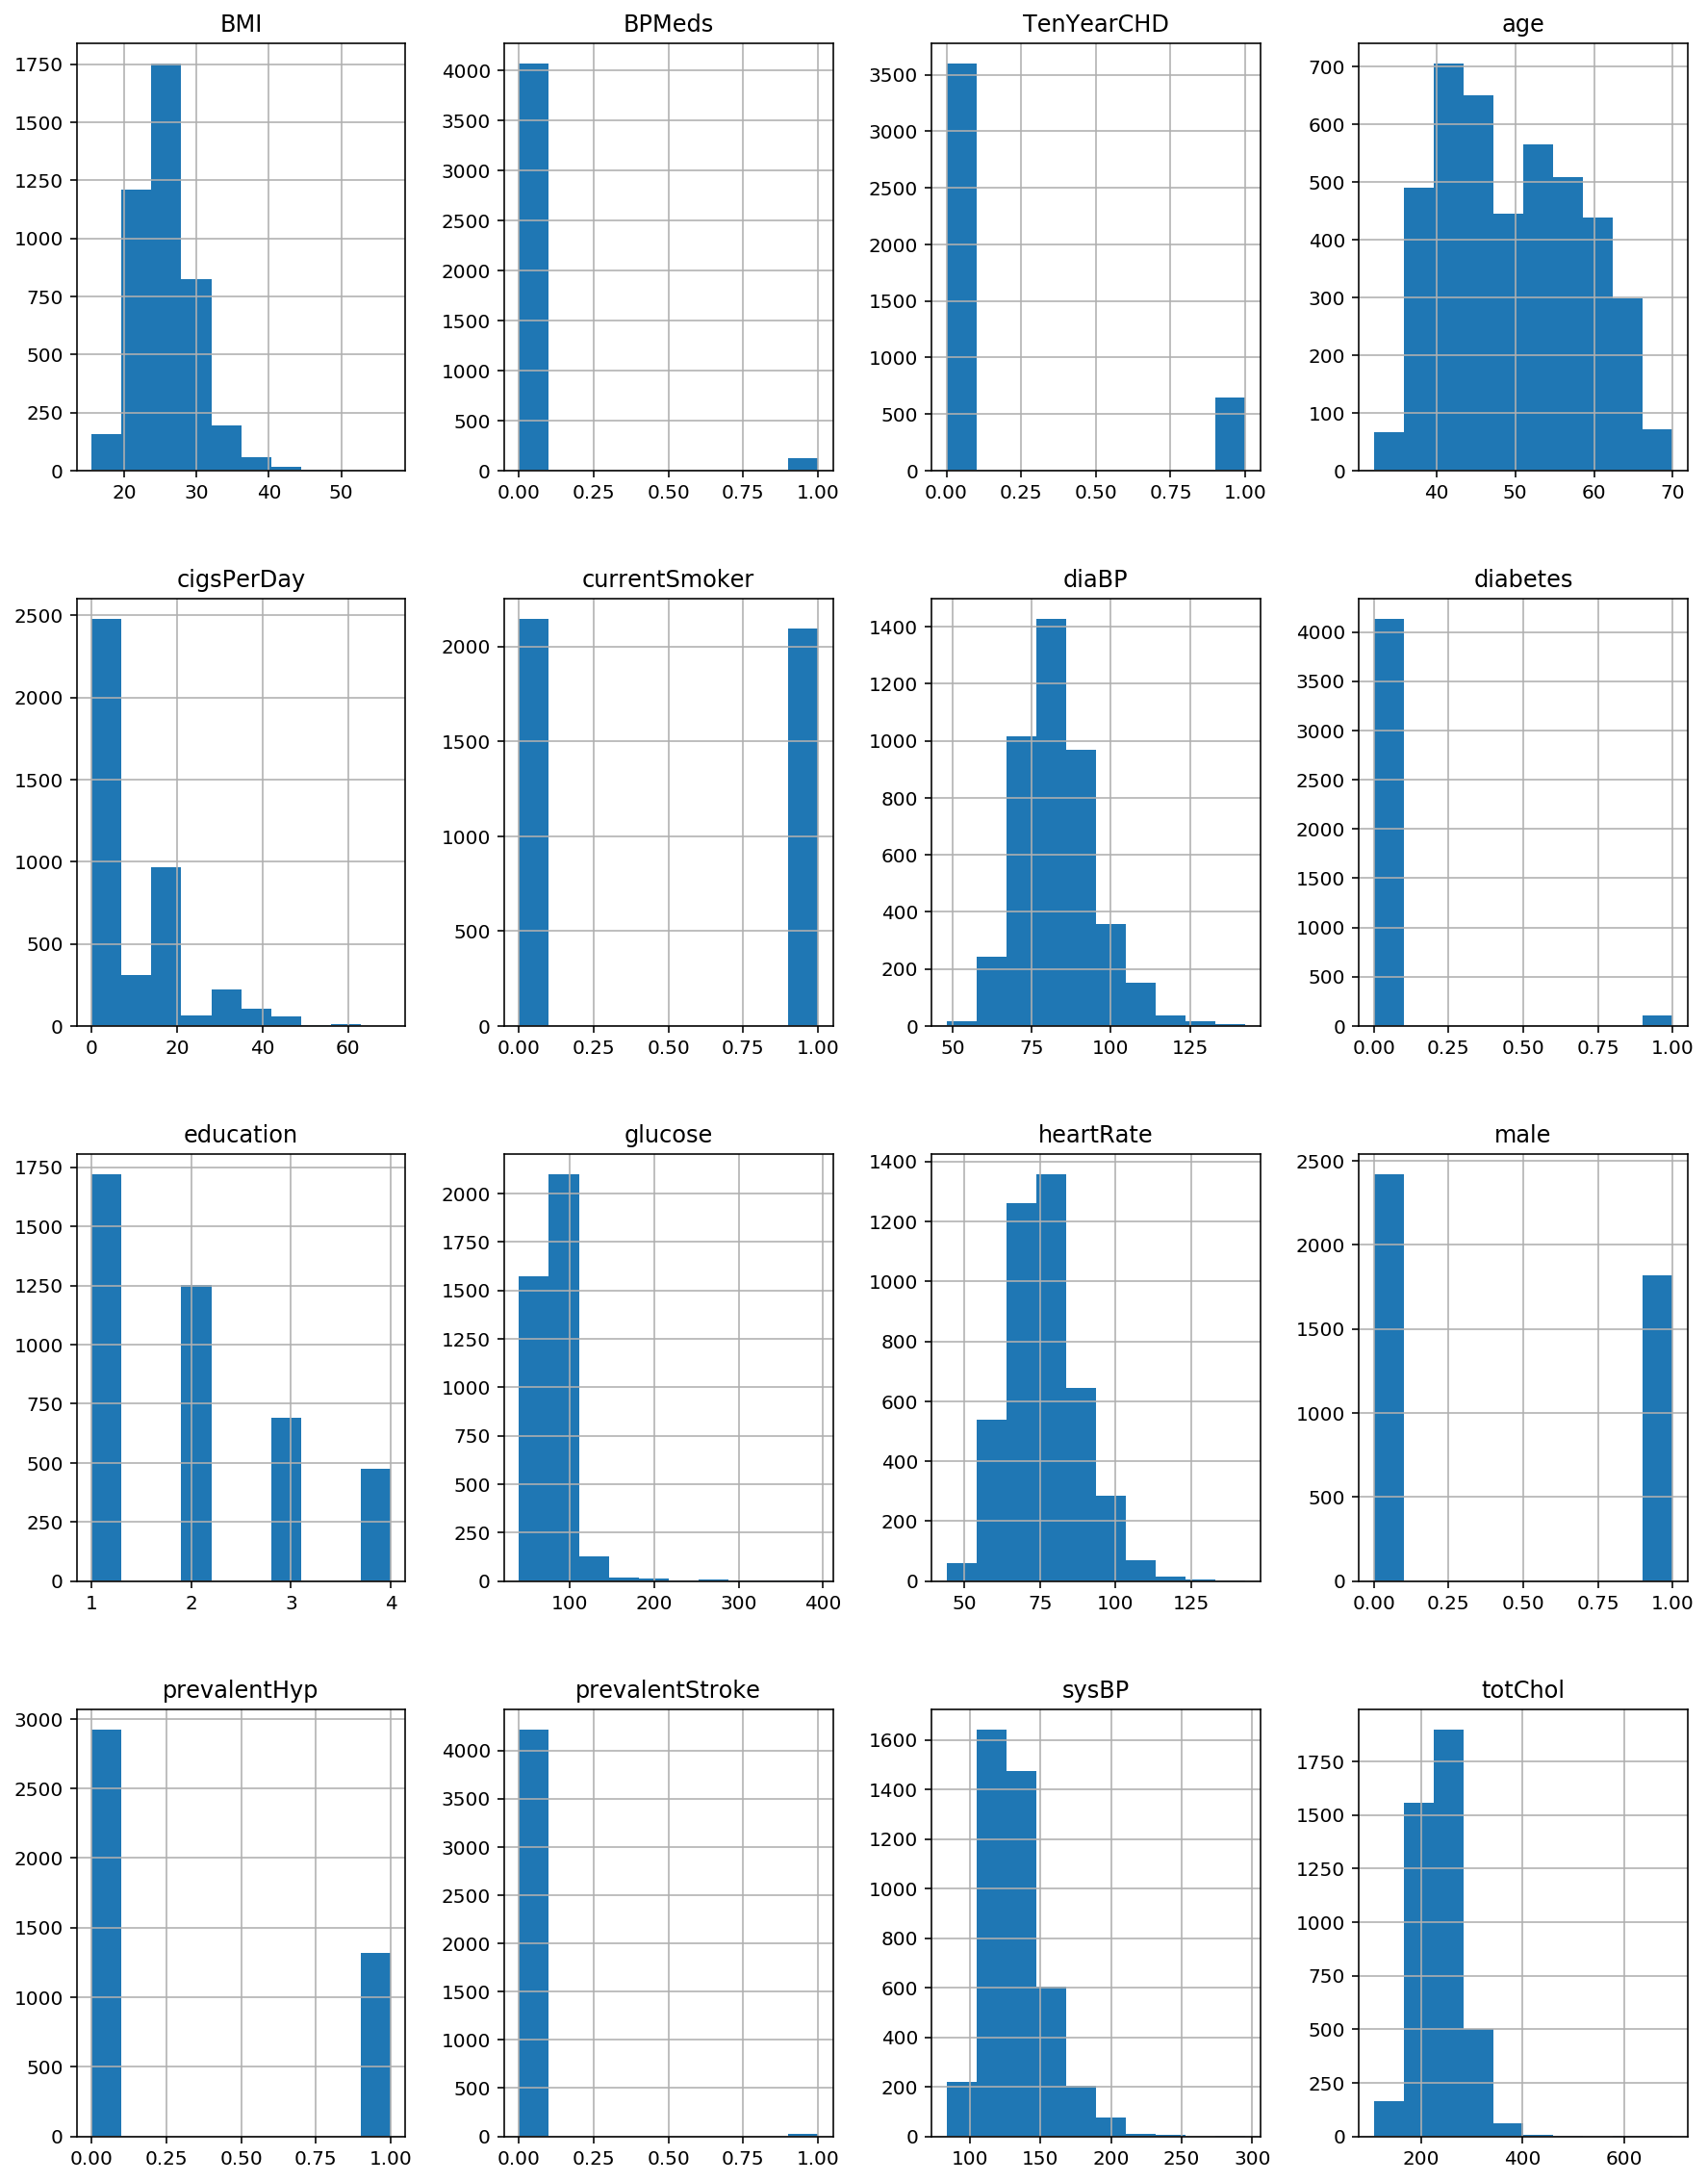

In [4]:
### Representing the data

fig = plt.figure(figsize = (15,20));
ax = fig.gca();
data.hist(ax = ax);

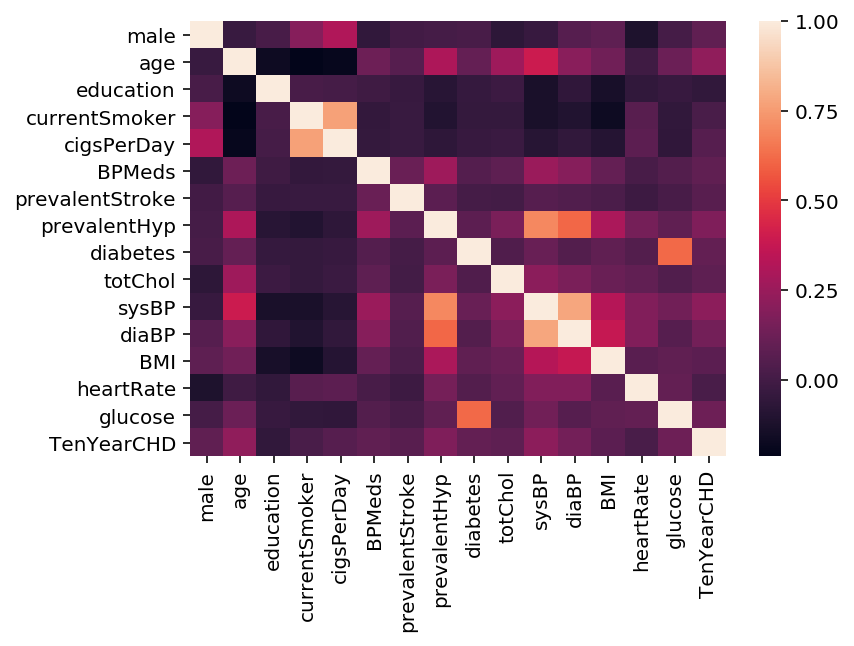

In [5]:
###Checking correlation between data

data_corr = data.corr();
sns.heatmap(data_corr);

In [6]:
data = data.drop(['education','glucose'], axis=1);
print(data.head())
print(data.shape)

   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  TenYearCHD  
0             0         0    195.0  106.0   70.0  26.97       80.0           0  
1             0         0    250.0  121.0   81.0  28.73       95.0           0  
2             0         0    245.0  127.5   80.0  25.34       75.0           0  
3             1         0    225.0  150.0   95.0  28.58       65.0           1  
4             0         0    285.0  130.0   84.0  23.10       85.0           0  
(4240, 14)


In [7]:
###Dropping missing data

print(data.isna().sum());
data = data.dropna();
print(data.isna().sum());
data.columns;


male                0
age                 0
currentSmoker       0
cigsPerDay         29
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
TenYearCHD          0
dtype: int64
male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64


In [8]:
###Spliting features and target variable
target = data.iloc[:,-1]
features = data.iloc[:,:-1]

print(target.head())
print(target.shape)
print(features.head())
print(features.shape)

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64
(4090,)
   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  
0             0         0    195.0  106.0   70.0  26.97       80.0  
1             0         0    250.0  121.0   81.0  28.73       95.0  
2             0         0    245.0  127.5   80.0  25.34       75.0  
3             1         0    225.0  150.0   95.0  28.58       65.0  
4             0         0    285.0  130.0   84.0  23.10       85.0  
(4090, 13)


In [9]:
###Determining the top features using selectkbest, the higher the score the more likely they are linked

best = SelectKBest(score_func=chi2, k=10)
fit = best.fit(features, target)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(features.columns)

feature_scores = pd.concat([data_columns,data_scores],axis=1) #Putting both into a single dataframe for clarity
feature_scores.columns = ['Feature','Score'] #Renaming columns

print(feature_scores.nlargest(10,'Score')) #Printing the top 10 features descending

         Feature       Score
9          sysBP  684.808068
1            age  310.610798
3     cigsPerDay  255.459035
8        totChol  223.403022
10         diaBP  150.413090
6   prevalentHyp   85.193134
7       diabetes   31.686949
4         BPMeds   29.123051
0           male   21.309482
11           BMI   15.525683


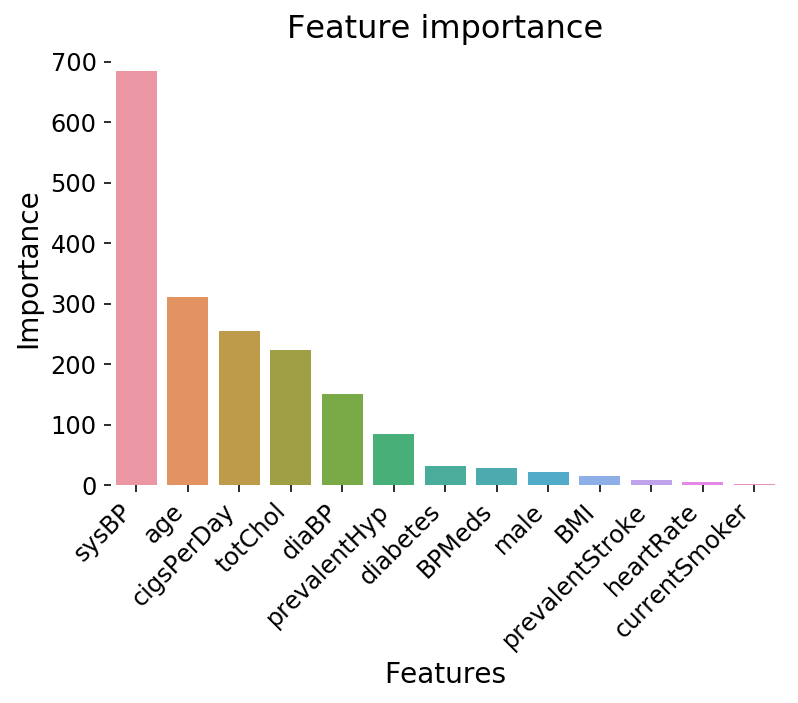

In [10]:
###Plotting a histogram based on the top features

feature_scores = feature_scores.sort_values(by='Score', ascending=False);

sns.barplot(x = 'Feature', y = 'Score', data = feature_scores)

plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.show();

In [11]:
###Making a list of top features

feature_list = feature_scores['Feature'].tolist()[0:10]

print(feature_list)

['sysBP', 'age', 'cigsPerDay', 'totChol', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male', 'BMI']


In [12]:
###Deleting data with less correlation with CHD from original dataframe

truncated_data = pd.concat([data[feature_list],data['TenYearCHD']],axis=1)

print(truncated_data.head())

   sysBP  age  cigsPerDay  totChol  diaBP  prevalentHyp  diabetes  BPMeds  \
0  106.0   39         0.0    195.0   70.0             0         0     0.0   
1  121.0   46         0.0    250.0   81.0             0         0     0.0   
2  127.5   48        20.0    245.0   80.0             0         0     0.0   
3  150.0   61        30.0    225.0   95.0             1         0     0.0   
4  130.0   46        23.0    285.0   84.0             0         0     0.0   

   male    BMI  TenYearCHD  
0     1  26.97           0  
1     0  28.73           0  
2     1  25.34           0  
3     0  28.58           1  
4     0  23.10           0  


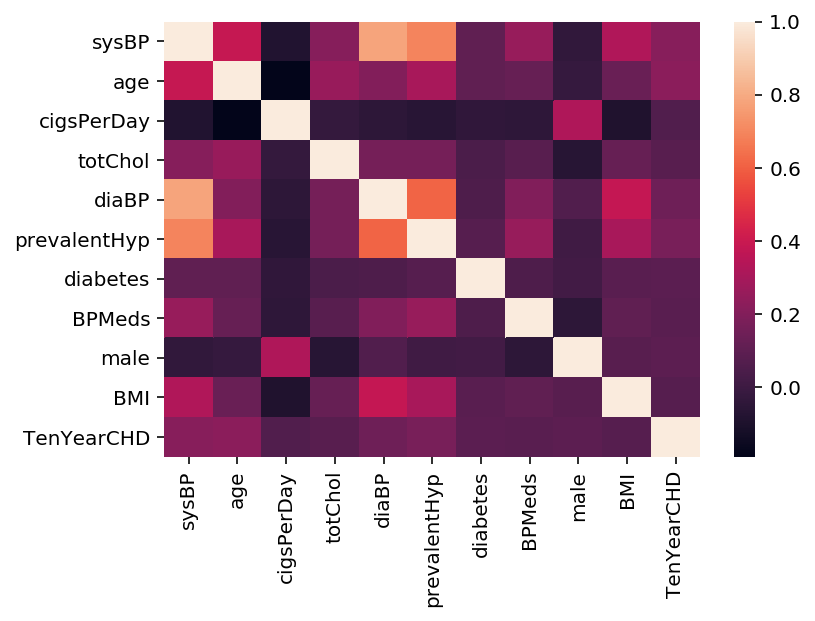

In [13]:
###Seeing correlation between truncated data

truncated_corr = truncated_data.corr()
sns.heatmap(truncated_corr);

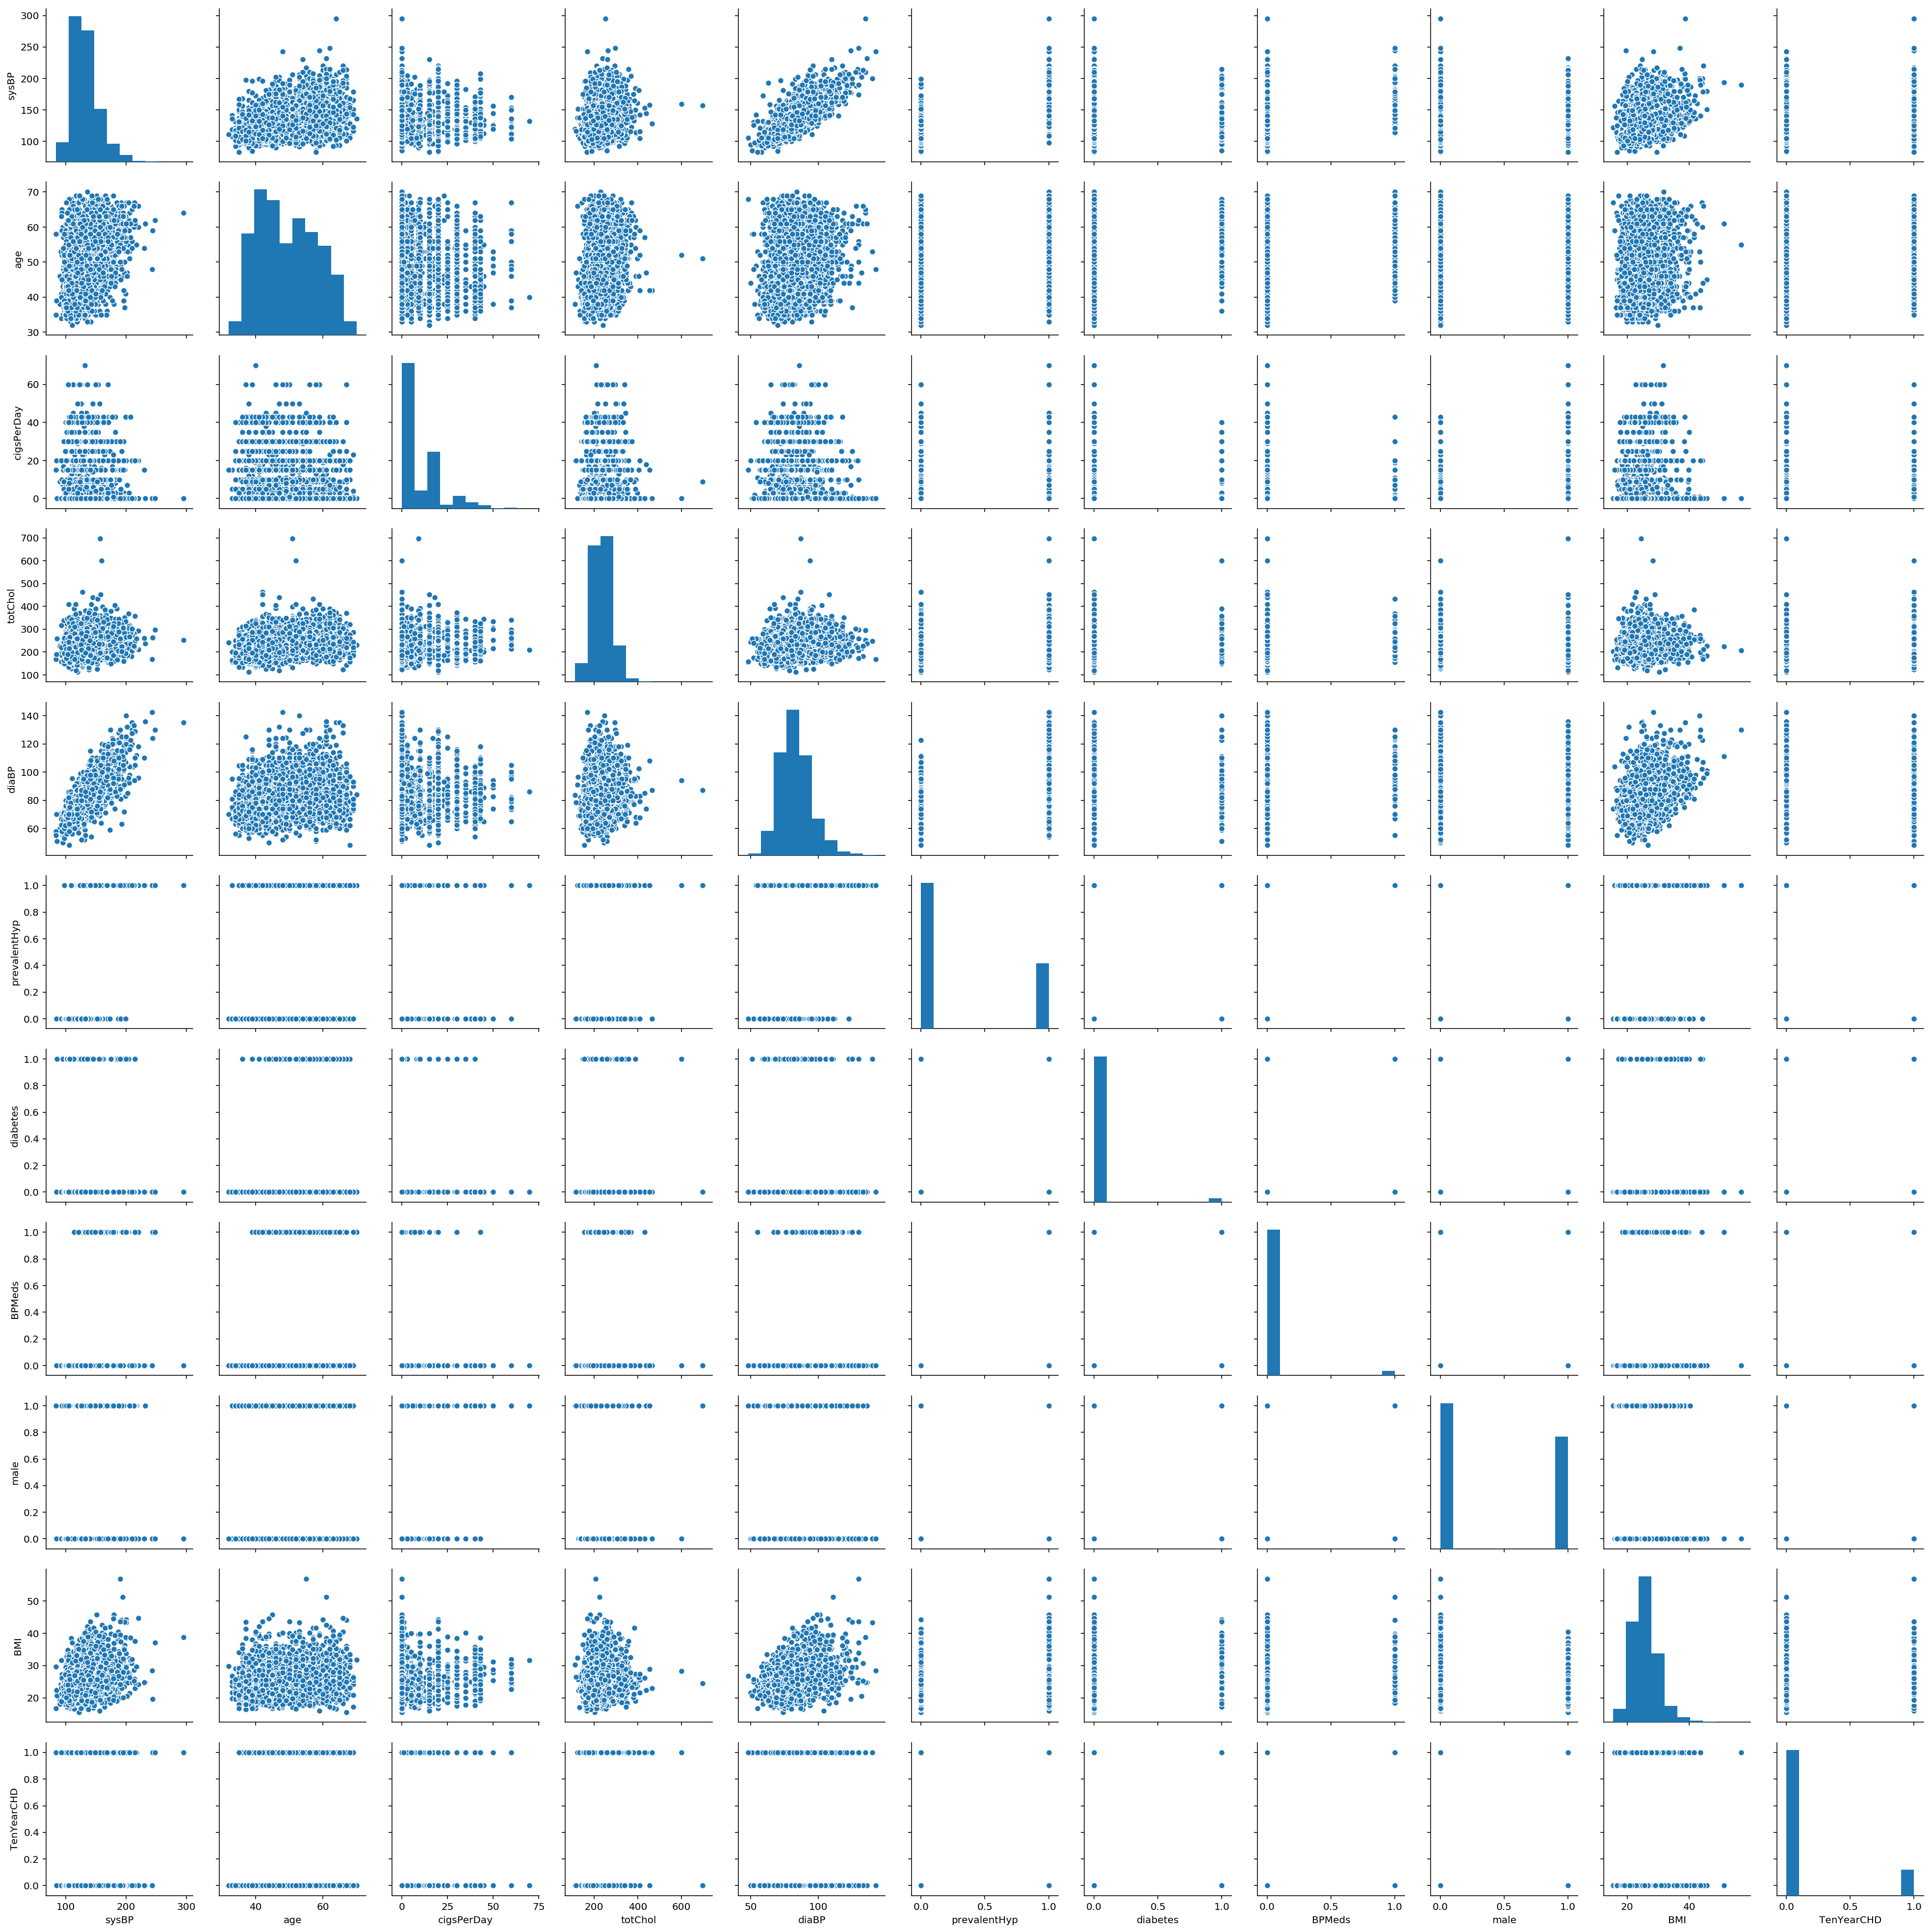

In [14]:
###Outlier detection

truncated_data.describe()
sns.pairplot(truncated_data);

In [ ]:
###Boxplots

column_name = list(truncated_data.columns);


for i in range(len(column_name)):
    sns.boxplot(truncated_data['{}'.format(column_name[i])]);
    plt.show();


In [15]:
###Cleaning up the dataframe

def cleaning(dataframe, feature, upper):
    
    dataframe_original = dataframe
    dataframe = dataframe.drop(dataframe[dataframe['{}'.format(feature)] > upper].index);
    print('Shape: {} ---> {}'.format(dataframe_original.shape, dataframe.shape))
    return dataframe;

truncated_data = cleaning(truncated_data, 'totChol', 599);
truncated_data = cleaning(truncated_data, 'BMI', 50);
truncated_data = cleaning(truncated_data, 'cigsPerDay', 50);
truncated_data = cleaning(truncated_data, 'sysBP', 250);
print('Shape: {}' .format(truncated_data.shape));

Shape: (4090, 11) ---> (4088, 11)
Shape: (4088, 11) ---> (4086, 11)
Shape: (4086, 11) ---> (4074, 11)
Shape: (4074, 11) ---> (4073, 11)
Shape: (4073, 11)


In [16]:
###Feature scaling

scaler = MinMaxScaler(feature_range=(0,1)) 
#scaled_data = pd.DataFrame(scaler.fit_transform(truncated_data), columns=truncated_data.columns)
scaled_data = truncated_data
print(scaled_data.head())

   sysBP  age  cigsPerDay  totChol  diaBP  prevalentHyp  diabetes  BPMeds  \
0  106.0   39         0.0    195.0   70.0             0         0     0.0   
1  121.0   46         0.0    250.0   81.0             0         0     0.0   
2  127.5   48        20.0    245.0   80.0             0         0     0.0   
3  150.0   61        30.0    225.0   95.0             1         0     0.0   
4  130.0   46        23.0    285.0   84.0             0         0     0.0   

   male    BMI  TenYearCHD  
0     1  26.97           0  
1     0  28.73           0  
2     1  25.34           0  
3     0  28.58           1  
4     0  23.10           0  


In [17]:
###Test
y = scaled_data.iloc[:,-1]
x = scaled_data.iloc[:,:-1]

print(y.head())
print(x.head())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

print(len(x_train), len(x_test))

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64
   sysBP  age  cigsPerDay  totChol  diaBP  prevalentHyp  diabetes  BPMeds  \
0  106.0   39         0.0    195.0   70.0             0         0     0.0   
1  121.0   46         0.0    250.0   81.0             0         0     0.0   
2  127.5   48        20.0    245.0   80.0             0         0     0.0   
3  150.0   61        30.0    225.0   95.0             1         0     0.0   
4  130.0   46        23.0    285.0   84.0             0         0     0.0   

   male    BMI  
0     1  26.97  
1     0  28.73  
2     1  25.34  
3     0  28.58  
4     0  23.10  
3258 815


3467
606
5.72 : 1


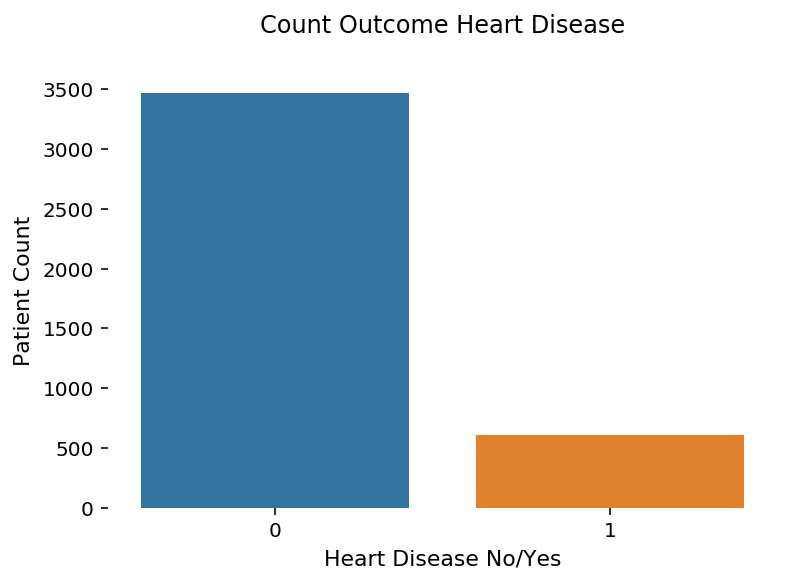

In [18]:
###Resampling dataset
target_count = scaled_data.TenYearCHD.value_counts()

print(target_count[0])
print(target_count[1])
print(round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(scaled_data.TenYearCHD)
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.show();

In [19]:
shuffled_data = scaled_data.sample(frac=1,random_state=1)

CHD_data = shuffled_data.loc[shuffled_data['TenYearCHD'] == 1]
non_CHD_data = shuffled_data.loc[shuffled_data['TenYearCHD'] == 0].sample(n=target_count[1], random_state = 1)

print(CHD_data.shape)
print(non_CHD_data.shape)



(606, 11)
(606, 11)


1.0 : 1


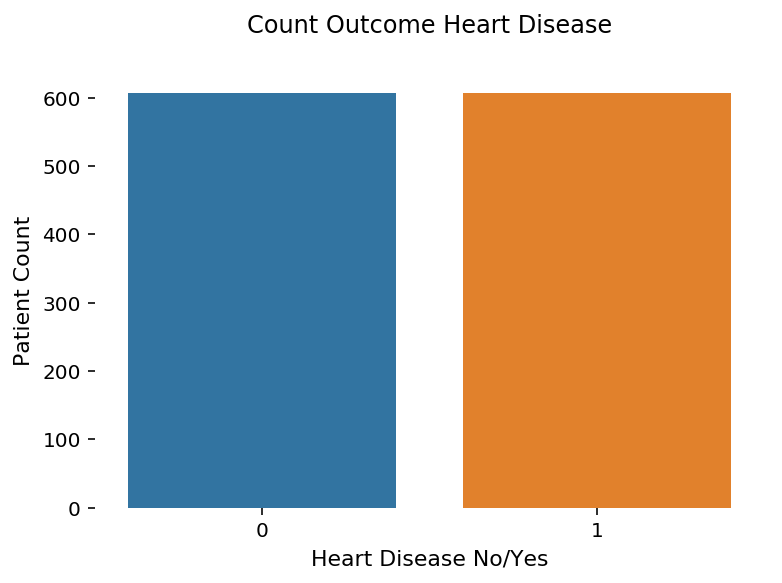

In [20]:
normalised_data = pd.concat([CHD_data, non_CHD_data])
normalised_data.TenYearCHD.value_counts()

normalised_target_count = normalised_data.TenYearCHD.value_counts()

sns.countplot(normalised_data.TenYearCHD)
print(round(normalised_target_count[0] / normalised_target_count[1], 2), ': 1')
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.show();

In [21]:
y_train = normalised_data.iloc[:,-1]
x_train = normalised_data.iloc[:,:-1]

In [22]:
def scores(model, y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score (y_test, pred)
    
    print("The accuracy score for {} is: {}%.".format(model, round(accuracy,3)*100))
    print("The f1 score for {} is: {}%.".format(model, round(f1,3)*100))
    print("The precision score for {} is: {}%.".format(model, round(precision,3)*100))
    print("The recall score for {} is: {}%.".format(model, round(recall,3)*100))
    
    return(accuracy, f1, precision, recall)
    

In [23]:
def confusion(dataframe, name):
    sns.heatmap(pd.DataFrame(dataframe), annot=True , fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('Confusion matrix {}\n'.format(name), y=1.1)

In [24]:
def model(classifier, name):
    classifier.fit(x_train, y_train);
    classifier_pred = classifier.predict(x_test);
    confusion(confusion_matrix(y_test, classifier_pred), name);
    scores(name, y_test, classifier_pred);

The accuracy score for Decision Trees is: 70.89999999999999%.
The f1 score for Decision Trees is: 49.7%.
The precision score for Decision Trees is: 33.1%.
The recall score for Decision Trees is: 100.0%.


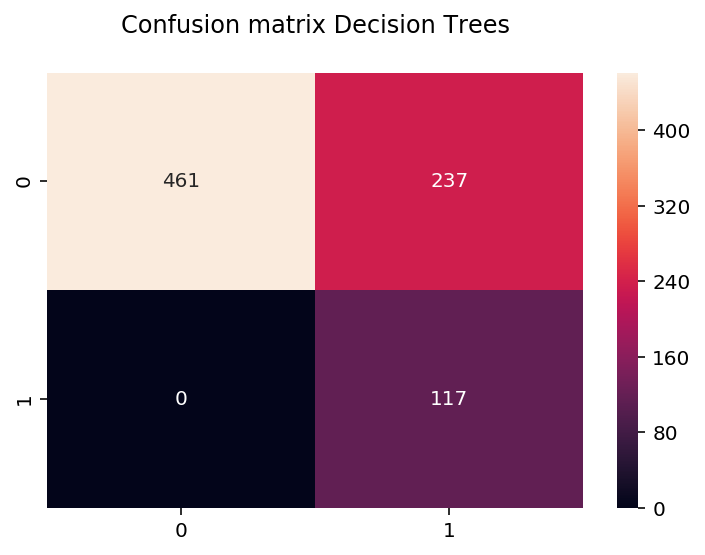

In [26]:
dtc = DecisionTreeClassifier();
model(dtc, 'Decision Trees')

The accuracy score for Random Forest is: 74.5%.
The f1 score for Random Forest is: 52.900000000000006%.
The precision score for Random Forest is: 36.0%.
The recall score for Random Forest is: 100.0%.


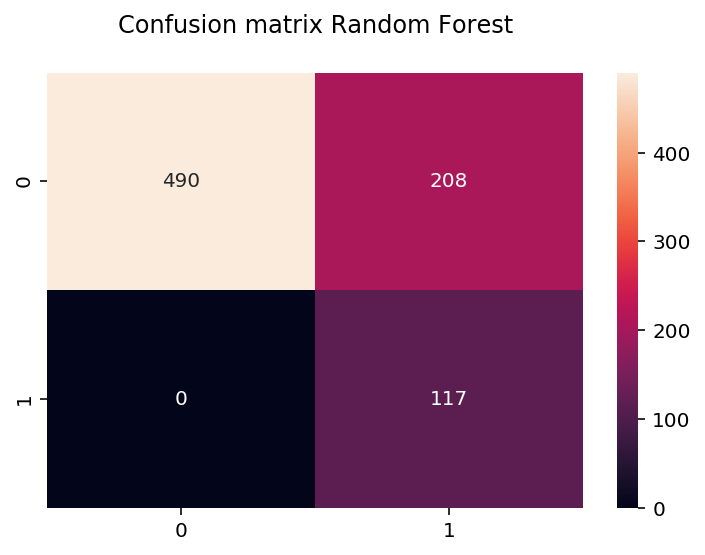

In [25]:
rfc = RandomForestClassifier(n_estimators= 100,bootstrap = True, max_features = 'sqrt');
model(rfc, 'Random Forest')

## Looking at the number of trees

In [2]:
from preprocessing_ml import *

Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module


In [3]:
X_train, X_test, y_train, y_test = split_data(scale_data(drop_missing(chose_features(pd.read_csv("framingham.csv")))))

In [4]:
def scores(name, y_test, pred, display):
    accuracy = accuracy_score(y_test, pred);
    f1 = f1_score(y_test, pred);
    precision = precision_score(y_test, pred);
    recall = recall_score(y_test, pred);
    
    if display == 'y':
        print("The accuracy score for {} is: {}%.".format(name, round(accuracy, 3) * 100))
        print("The f1 score for {} is: {}%.".format(name, round(f1, 3) * 100))
        print("The precision score for {} is: {}%.".format(name, round(precision, 3) * 100))
        print("The recall score for {} is: {}%.".format(name, round(recall, 3) * 100))
        return(accuracy, f1, precision, recall);
    elif display == 'n':
        return(accuracy, f1, precision, recall);
    else:
        print("Error: please choose 'y' or 'n'.")

In [5]:
def model(classifier, name, X_train, X_test, y_train, y_test, display):
    classifier.fit(X_train, y_train);
    classifier_pred = classifier.predict(X_test);
    score = scores(name, y_test, classifier_pred, display);
    
    accuracy = score[0];
    f1 = score[1];
    precision = score[2];
    recall = score[3];
    
    return(accuracy, f1, precision, recall);

In [6]:
model(DecisionTreeClassifier(), 'Decision Tree', X_train, X_test, y_train, y_test, 'y');

The accuracy score for Decision Tree is: 73.0%.
The f1 score for Decision Tree is: 22.0%.
The precision score for Decision Tree is: 21.4%.
The recall score for Decision Tree is: 22.8%.


In [7]:
model(RandomForestClassifier(n_estimators=10, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

The accuracy score for Random Forest is: 83.1%.
The f1 score for Random Forest is: 16.2%.
The precision score for Random Forest is: 48.0%.
The recall score for Random Forest is: 9.8%.


In [8]:
y = np.linspace(1,1000,100);
accuracy_list = [];
for i in range(len(y)):
    accuracy_list.append(model(RandomForestClassifier(n_estimators=i+1, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'n')[0]);

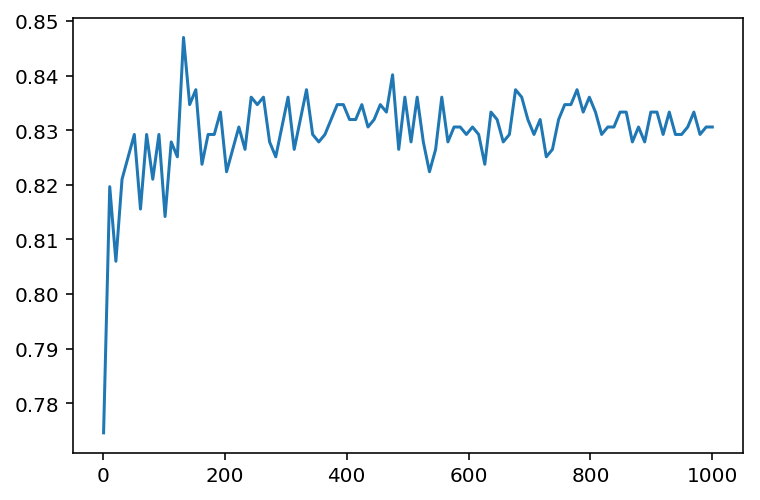

In [9]:
plt.plot(y, accuracy_list);
plt.show();

## Applying the Model

In [10]:
input_data = pd.DataFrame(columns = X_train.columns)
input_data.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI,prevalentStroke,education,heartRate,currentSmoker


In [11]:
data = [{'sysBP':120, 'glucose':100, 'age':35, 'totChol':350, 'cigsPerDay':10, 'diaBP':120, 'prevalentHyp':1, 'diabetes':0, 'BPMeds':1, 'male':1, 'BMI':45, 'prevalentStroke':0, 'education': 3, 'heartRate': 76, 'currentSmoker':1}]

In [12]:
my_data = input_data.append(data,ignore_index=True)
my_data.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI,prevalentStroke,education,heartRate,currentSmoker
0,120,100,35,350,10,120,1,0,1,1,45,0,3,76,1


In [20]:
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_data = pd.DataFrame(scaler.fit_transform(my_data), columns=my_data.columns)

scaled_data.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI,prevalentStroke,education,heartRate,currentSmoker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
